In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [110]:
diabetes_data = pd.read_csv('diabetes.csv')

db = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
diabetes_data[db] = diabetes_data[db].replace(0, np.nan)

diabetes_data[db] = diabetes_data[db].fillna(diabetes_data[db].median())

In [112]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy:  0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[79 20]
 [19 36]]


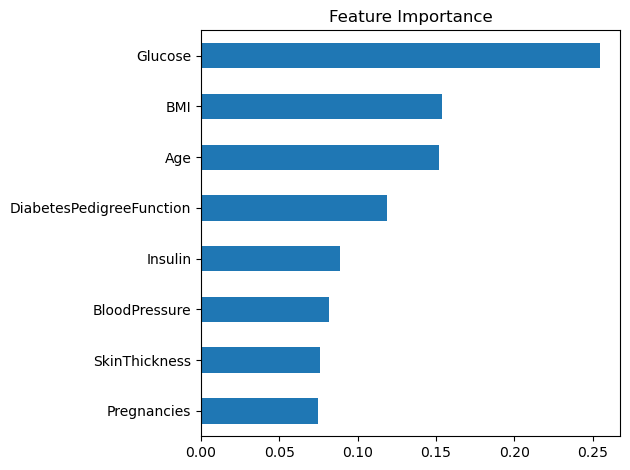

In [114]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")
plt.tight_layout()
plt.show()

In [120]:
# UNCOMMENT To save this model

# import joblib

# joblib.dump(model, 'diabetes_model.pkl')
# print("Model saved as 'diabetes_model.pkl'")

In [ ]:
# UNCOMMENT To load this model and use it:

# loaded_model = joblib.load('diabetes_model.pkl')